In [2]:
!pip install --upgrade pandas
!pip install skimpy
!pip install numpy<2
!pip install matplotlib seaborn --force-reinstall





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 53.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.2 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.17.1
    Uninstalling ipykernel-6.17.1:
      Successfully uninstalled ipykernel-6.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are in

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from skimpy import clean_columns

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [2]:
from google.colab import files
uploaded = files.upload()




Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:


df = pd.read_csv("/content/Mall_Customers.csv")  # أو استخدم اسم الملف اللي اتغير بعد الرفع
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.Gender.value_counts()


,count
Gender,
Female,112
Male,88


In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
CustomerID,200.000,100.500,57.879,1.000,50.750,100.500,150.250,200.000
Age,200.000,38.850,13.969,18.000,28.750,36.000,49.000,70.000
Annual Income (k$),200.000,60.560,26.265,15.000,41.500,61.500,78.000,137.000
Spending Score (1-100),200.000,50.200,25.824,1.000,34.750,50.000,73.000,99.000


In [7]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)

    print(f"\033[1m\033[91mColumn:\033[0m \033[1m\033[94m{column}\033[0m")
    print(f"\033[1m\033[92mNumber of Unique Values:\033[93m {unique_count}")

    if unique_count <= 10:
        print(f"\033[1mUnique Values:\033[0m {unique_values}\n")
    else:
        print(f"\033[95mFirst 10 Unique Values:\033[0m {unique_values[:10]}")
        print(f"... and {unique_count - 10} more unique values\n")


Column: CustomerID
Number of Unique Values: 200
First 10 Unique Values: [ 1  2  3  4  5  6  7  8  9 10]
... and 190 more unique values

Column: Gender
Number of Unique Values: 2
Unique Values: ['Male' 'Female']

Column: Age
Number of Unique Values: 51
First 10 Unique Values: [19 21 20 23 31 22 35 64 30 67]
... and 41 more unique values

Column: Annual Income (k$)
Number of Unique Values: 64
First 10 Unique Values: [15 16 17 18 19 20 21 23 24 25]
... and 54 more unique values

Column: Spending Score (1-100)
Number of Unique Values: 84
First 10 Unique Values: [39 81  6 77 40 76 94  3 72 14]
... and 74 more unique values



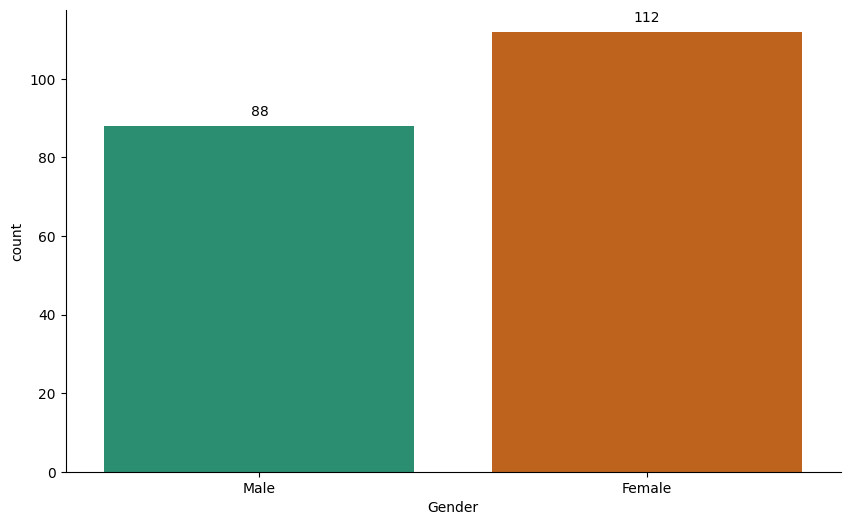

In [8]:
ax = sns.countplot(x=df["Gender"], palette='Dark2')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()


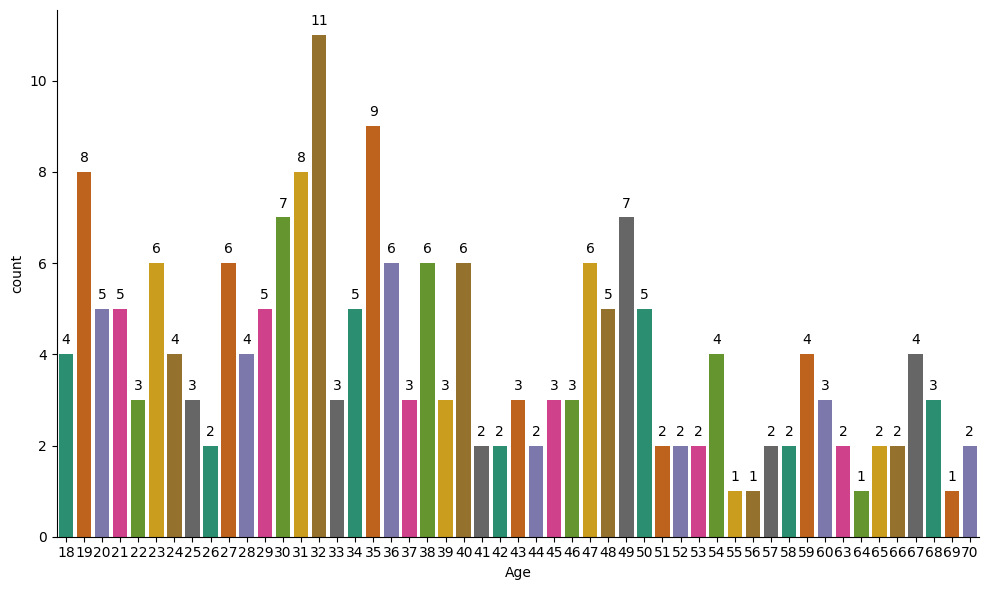

In [10]:
ax = sns.countplot(x=df["Age"], palette='Dark2')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.tight_layout()
plt.show()


In [11]:
class_mapping = {'Female': 0, 'Male': 1}
df['Gender'] = df['Gender'].map(class_mapping)


In [12]:
df.Gender.value_counts()


,count
Gender,
0,112
1,88


In [21]:
df.head()

,customer_id,gender,age,annual_income_k_$,spending_score_1_100
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [16]:
df = clean_columns(df)


In [25]:
df.rename(columns={'annual_income_k_$': 'annual_income'}, inplace=True)
df.rename(columns={'spending_score_1_100': 'spending_score'}, inplace=True)


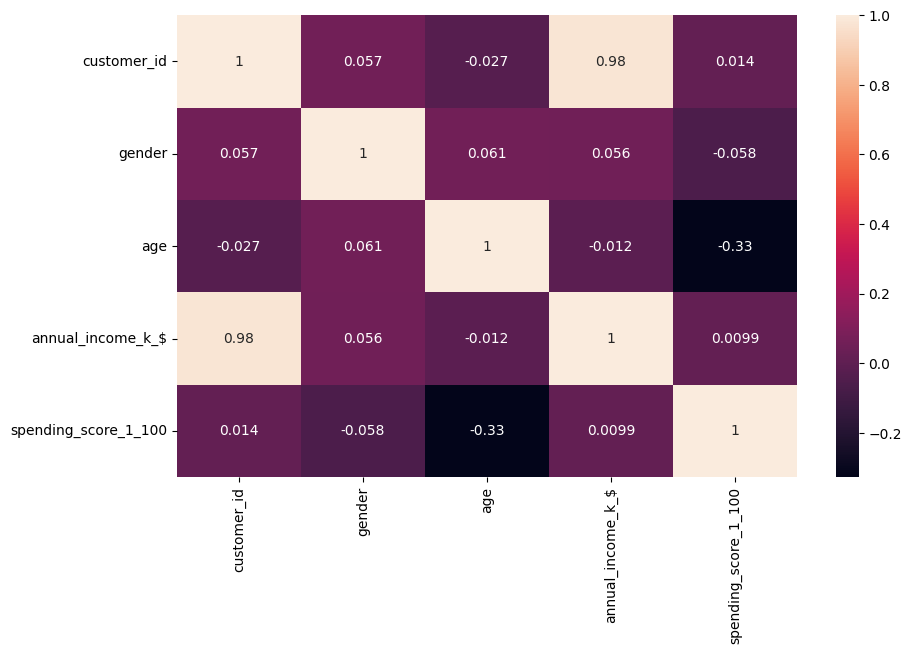

In [17]:
sns.heatmap(data=df.corr(), annot=True);


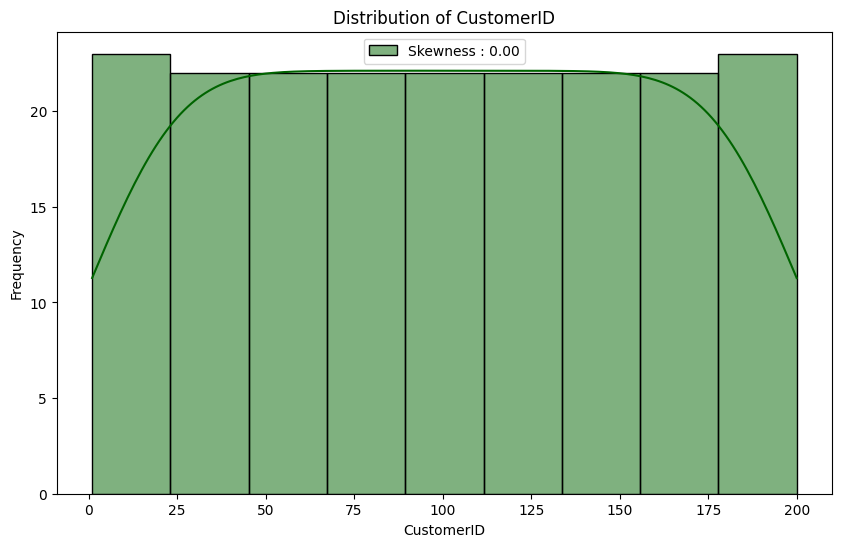

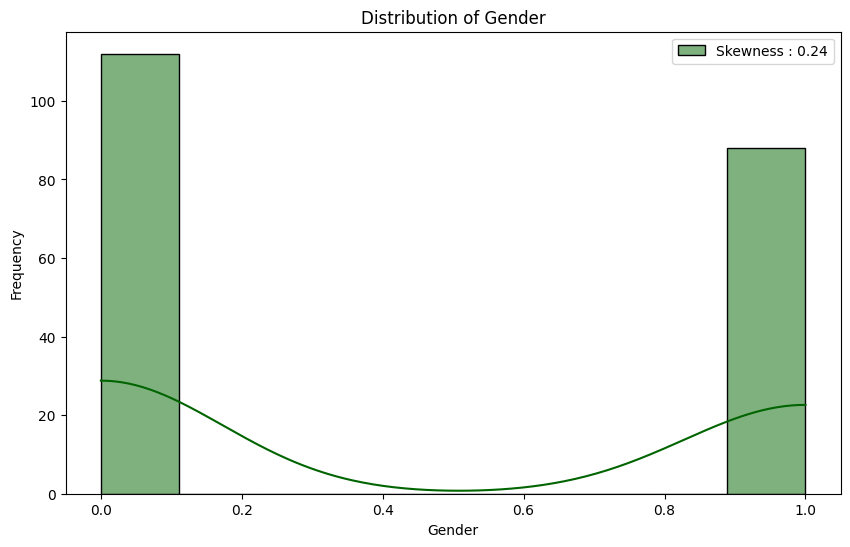

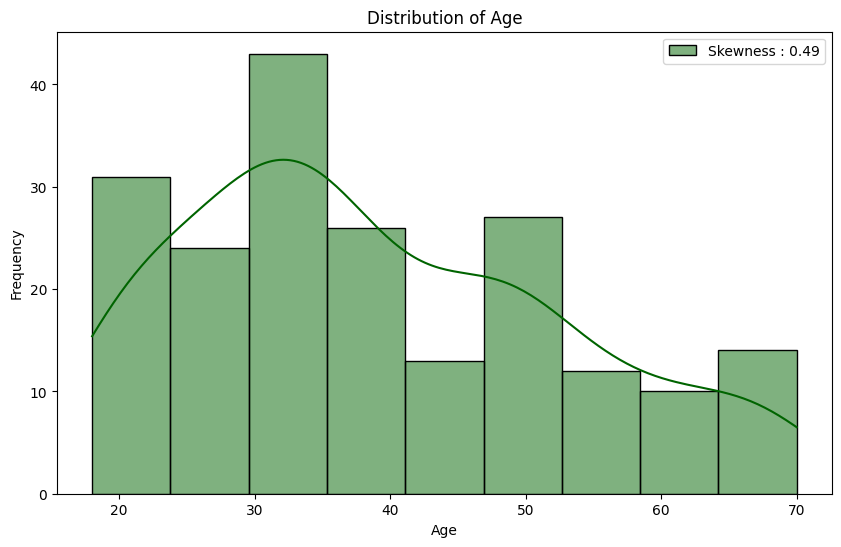

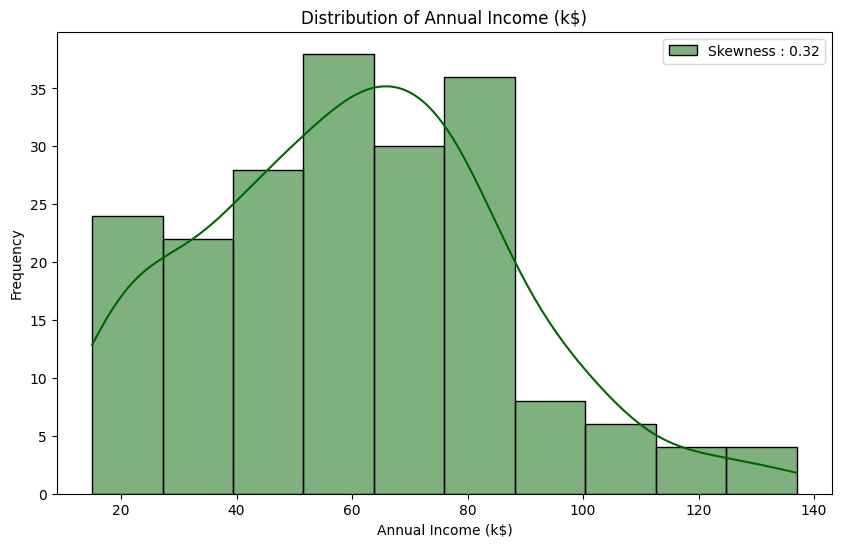

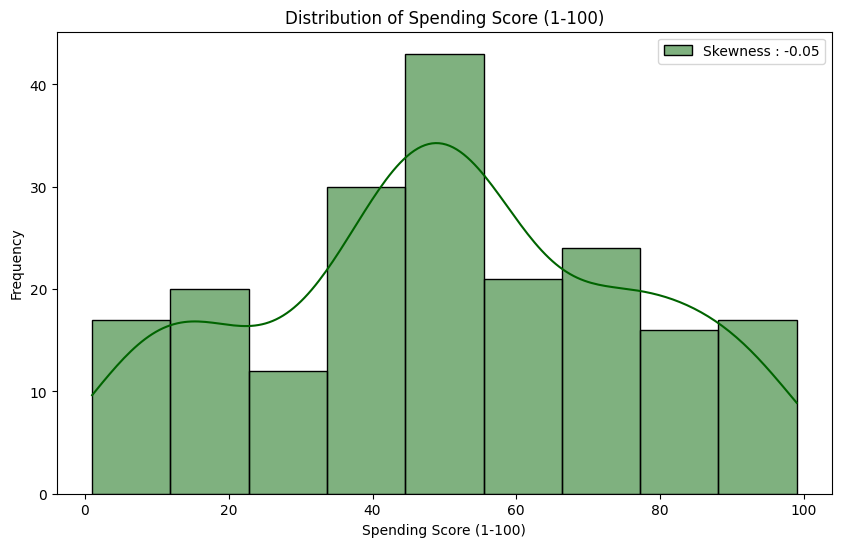

In [13]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    g = sns.histplot(df[col], color="darkgreen", kde=True, label=f"Skewness : {df[col].skew():.2f}")
    plt.legend(loc="best")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


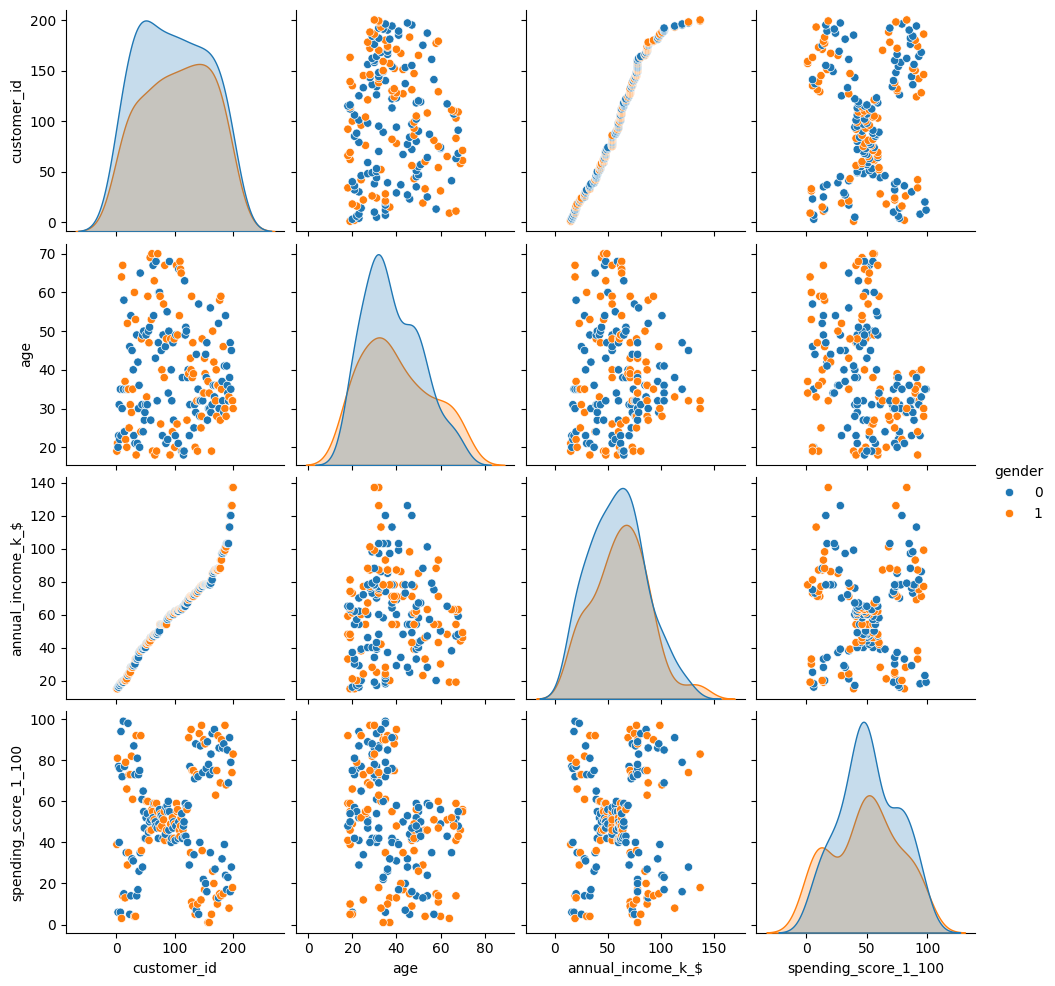

In [18]:
sns.pairplot(data=df, hue="gender")
plt.show()


In [23]:
sns.scatterplot(x= df['age'], y= df['annual_income'], hue='gender', data=df);


KeyError: 'annual_income'

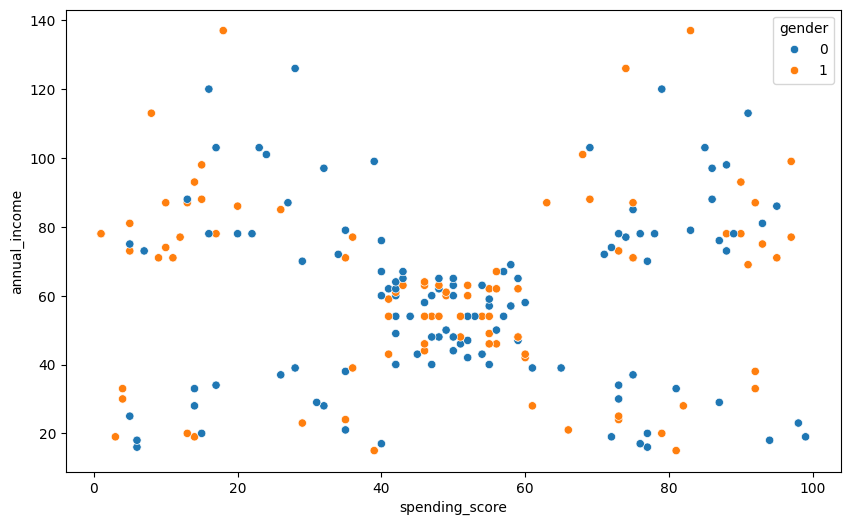

In [26]:
sns.scatterplot(x= df['spending_score'], y= df['annual_income'], hue='gender', data=df);


In [27]:
import plotly.express as px

def create_pie_chart_of_count(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    fig = px.pie(df_not_null.groupby([column_name]).size().reset_index(name='count'), names=column_name, values='count')
    fig.show()

create_pie_chart_of_count(df, 'gender')


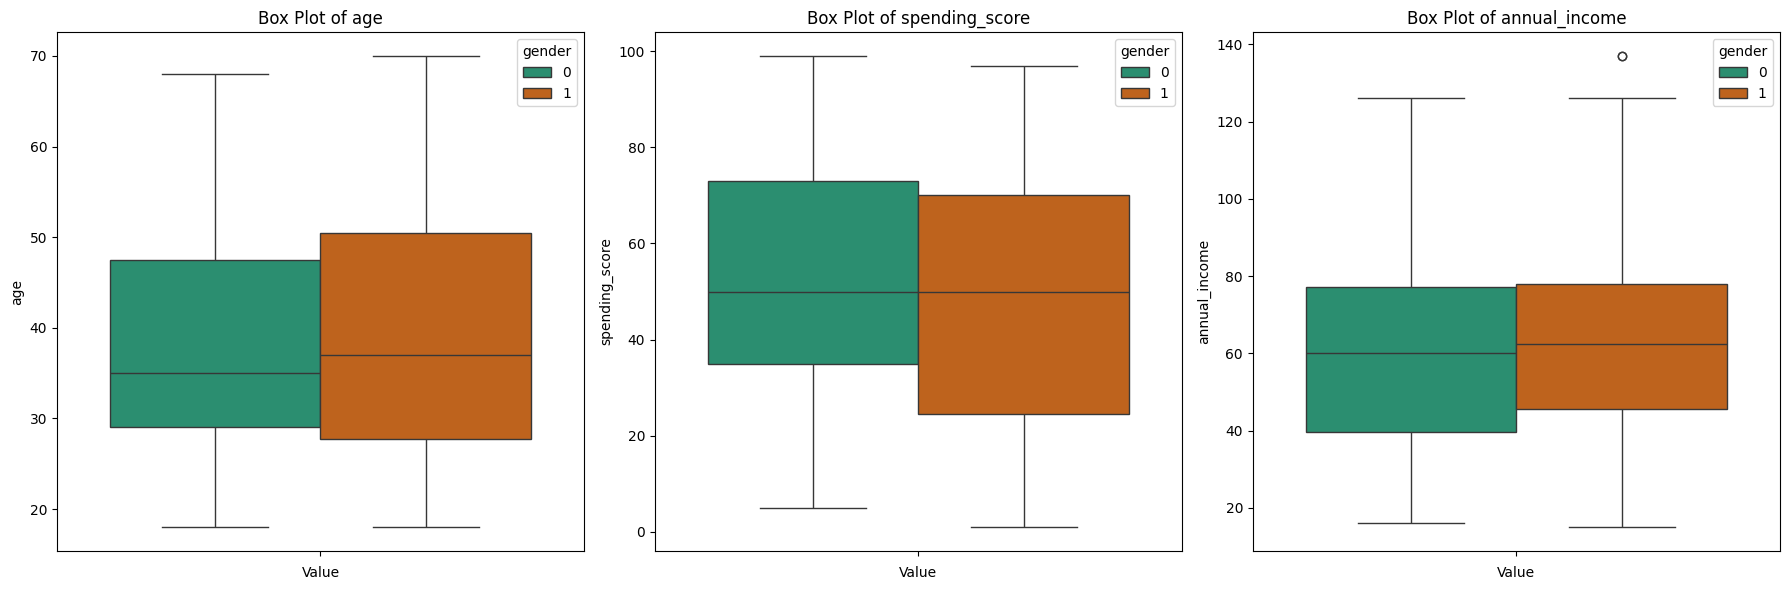

In [28]:
specific_columns = ["age", "spending_score", "annual_income"]

plt.figure(figsize=(18, 6))

for i, col in enumerate(specific_columns, 1):
    plt.subplot(1, len(specific_columns), i)
    sns.boxplot(y=col, data=df, hue="gender",palette ="Dark2")
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()


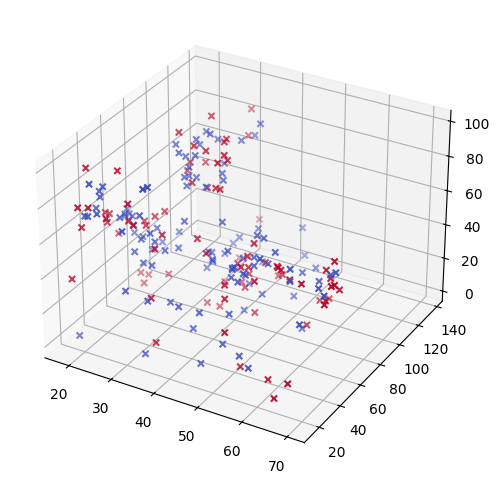

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Düzeltme: sütun isimleri ve renkler
ax.scatter(df['age'],
           df['annual_income'],
           df['spending_score'],
           c=df['gender'], cmap='coolwarm', marker='x')

plt.show()


In [30]:
import plotly.express as px

fig = px.scatter_3d(x=df['age'], y=df['annual_income'],
                    z=df['spending_score'], color=df["gender"])
fig.show()


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df["age"] = scaler.fit_transform(df[["age"]])
df["annual_income"] = scaler.fit_transform(df[["annual_income"]])
df["spending_score"] = scaler.fit_transform(df[["spending_score"]])


In [32]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,1,-1.425,-1.739,-0.435
1,2,1,-1.281,-1.739,1.196
2,3,0,-1.353,-1.701,-1.716
3,4,0,-1.138,-1.701,1.040
4,5,0,-0.563,-1.663,-0.396


In [48]:
X = df.copy()


In [33]:
df.to_csv("clean.csv", index = False)


clustering

In [34]:
X = pd.read_csv("clean.csv")


In [35]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=61)


In [36]:
K_means_model.fit_predict(df)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [37]:
from sklearn.neighbors import BallTree  # BallTree, veri noktaları arasındaki uzaklık sorgularını hızlı bir şekilde gerçekleştirmek için kullanılan bir veri yapısıdır.
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

hopkins(df, df.shape[0])

np.float64(0.46522960682640285)

In [38]:
hopkins(X, 60)

np.float64(0.4646120414096673)

In [39]:
ssd = []    # inertia  .. SSD, "Sum of Squared Distances" (mesafelerin karelerinin toplamı)

K = range(2,10)   # minimum 2 küme ile başladık

for k in K:                                          # Her bir farklı küme sayısı için K-Means modelini oluşturur ve eğitir.
    model = KMeans(n_clusters =k, random_state=61)
    model.fit(X)
    ssd.append(model.inertia_)


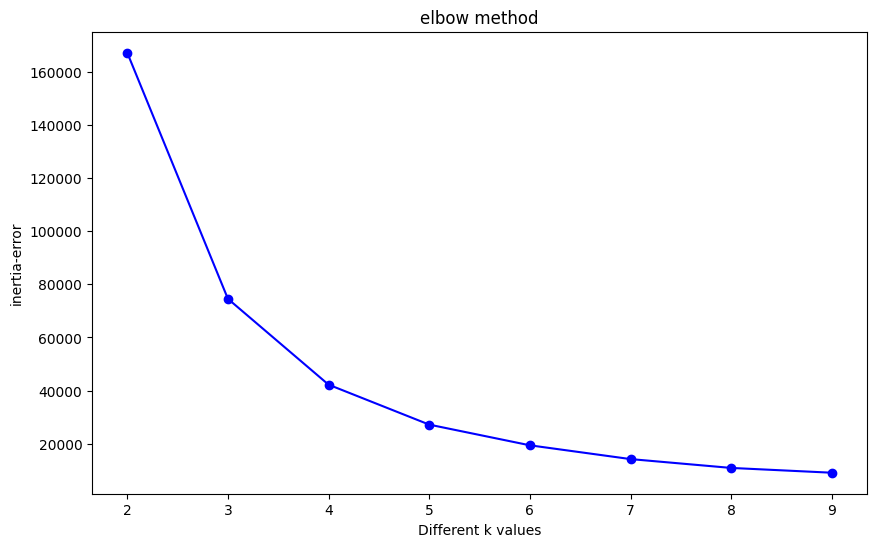

In [40]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")
plt.show()


In [41]:
ssd


[167169.74460261405,
 74551.65674924129,
 42239.13755205083,
 27202.8693927259,
 19416.49016142556,
 14228.246406202015,
 10899.960234515716,
 9095.577282156486]

In [42]:
pd.Series(ssd).diff()


,0
0,NaN
1,-92618.088
2,-32312.519
3,-15036.268
4,-7786.379
5,-5188.244
6,-3328.286
7,-1804.383


In [43]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff


,0
1,NaN
2,92618.088
3,32312.519
4,15036.268
5,7786.379
6,5188.244
7,3328.286
8,1804.383


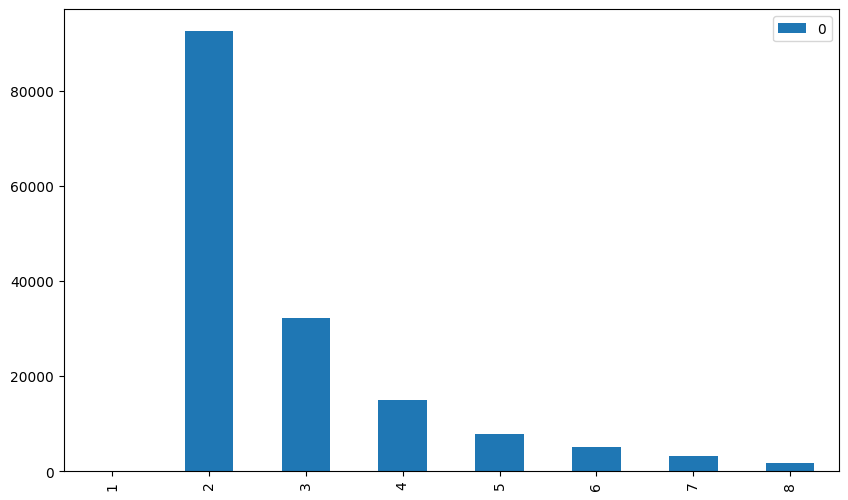

In [44]:
df_diff.plot(kind='bar');


In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=61)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X)
visualizer.show();
